In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
pd.options.display.max_columns = None

# Display Top 5 Rows of The Dataset

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Check Last 5 Rows of The Dataset

In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [7]:
data.shape

(284807, 31)

In [8]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


 Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Check Null Values In The Dataset

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
data = data.drop(['Time'],axis=1)

In [15]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [16]:
data.shape

(284807, 30)

In [17]:
data.duplicated().any()

True

# Let's Remove Duplicated Values

In [18]:
data = data.drop_duplicates()

In [19]:
data.shape

(275663, 30)

In [20]:
284807- 275663

9144

# Not Handling Imbalanced

In [21]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='Class', ylabel='count'>

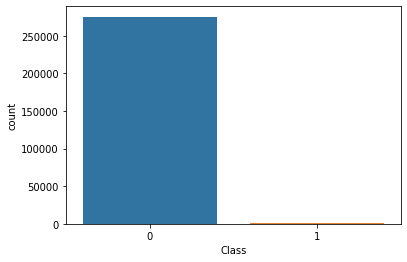

In [23]:
sns.countplot(data['Class'])

# Store Feature Matrix In X And Response (Target) In Vector y

In [24]:
X = data.drop('Class',axis=1)
y = data['Class']

# Splitting The Dataset Into The Training Set And Test Set

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# Handling Imbalanced Dataset

# Undersampling

In [26]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [27]:
normal.shape

(275190, 30)

In [28]:
fraud.shape

(473, 30)

In [29]:
normal_sample=normal.sample(n=473)

In [30]:
normal_sample.shape

(473, 30)

In [31]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [32]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [33]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.754009,-0.252564,1.658814,-1.438646,-0.227598,-0.210843,-0.690573,-0.146646,0.963929,-0.069112,-0.397198,-2.871496,3.042227,0.177478,-1.090610,1.532918,0.350132,-0.579169,-0.041529,-0.153611,0.209549,0.941267,-0.289791,-0.437204,-0.173174,-0.294556,-0.271884,0.118892,-0.275267,0
1,-0.474399,-0.221818,1.769394,-1.980302,-0.077241,0.602886,0.123159,0.082013,-1.087403,0.207508,0.326469,-0.995052,-0.749676,-0.393889,-0.243264,1.362725,-0.214177,-0.488467,1.639236,0.378116,-0.057092,-0.297513,-0.176333,0.145080,0.262165,-0.326726,-0.145106,-0.163668,-0.113344,0
2,-2.742515,2.064126,2.196278,-0.889241,0.440720,-0.288075,1.811172,-1.630680,5.365180,4.255846,0.684399,-3.016702,0.857871,-1.745306,-1.792616,-1.298176,-0.220104,-0.659637,-0.658541,1.776919,-1.088368,-0.068825,-0.295574,0.323817,0.385197,0.103787,-0.363584,-1.519552,-0.353189,0
3,2.056411,-0.125283,-1.148543,0.394506,-0.135631,-1.141399,0.150248,-0.292374,0.644829,0.087962,-0.978993,0.059564,-0.530464,0.392172,0.120050,-0.031927,-0.305924,-0.743538,0.203309,-0.242780,-0.301151,-0.781509,0.322220,-0.126976,-0.302744,0.206294,-0.076540,-0.061342,-0.313289,0
4,-2.939069,1.134611,1.489090,1.321609,-2.038069,-0.312985,-0.687178,1.097710,0.566128,0.690476,-0.642313,-0.524031,-1.050954,0.409600,2.154840,0.530855,0.108006,0.954552,0.074620,0.348719,0.167211,0.693655,-0.303515,0.713439,0.363228,-0.040770,0.546236,0.431051,0.046579,0


In [34]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred1 = log.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred1)

0.9421052631578948

In [40]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [41]:
precision_score(y_test,y_pred1)

0.9789473684210527

In [42]:
recall_score(y_test,y_pred1)

0.9117647058823529

In [43]:
f1_score(y_test,y_pred1)

0.9441624365482234

# Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred2 = dt.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred2)

0.9368421052631579

In [47]:
precision_score(y_test,y_pred2)

0.95

In [48]:
recall_score(y_test,y_pred2)

0.9313725490196079

In [49]:
f1_score(y_test,y_pred2)

0.9405940594059405

# Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred3 = rf.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred3)

0.9210526315789473

In [53]:
precision_score(y_test,y_pred3)

0.9484536082474226

In [54]:
recall_score(y_test,y_pred3)

0.9019607843137255

In [55]:
f1_score(y_test,y_pred3)

0.9246231155778893

In [56]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [57]:
final_data

,Models,ACC
0,LR,94.210526
1,DT,93.684211
2,RF,92.105263


<AxesSubplot:xlabel='Models', ylabel='ACC'>

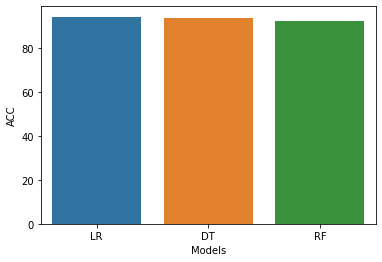

In [58]:
sns.barplot(final_data['Models'],final_data['ACC'])

# Oversampling

In [59]:
X = data.drop('Class',axis=1)
y = data['Class']

In [60]:
X.shape

(275663, 29)

In [61]:
y.shape

(275663,)

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [64]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

# Logistic Regression

In [66]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [67]:
y_pred1 = log.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred1)

0.9457829136233148

In [69]:
precision_score(y_test,y_pred1)

0.9730094727297282

In [70]:
recall_score(y_test,y_pred1)

0.9169318037197971

In [71]:
f1_score(y_test,y_pred1)

0.9441386798457448

# Decision Tree Classifier

In [72]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
y_pred2 = dt.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred2)

0.9981467349831026

In [75]:
precision_score(y_test,y_pred2)

0.9974762605080161

In [76]:
recall_score(y_test,y_pred2)

0.9988182462774757

In [77]:
f1_score(y_test,y_pred2)

0.9981468023255814

# Random Forest Classifier

In [78]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
y_pred3 = rf.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred3)

0.9999273229405138

In [81]:
precision_score(y_test,y_pred3)

0.9998545745396376

In [82]:
recall_score(y_test,y_pred3)

1.0

In [83]:
f1_score(y_test,y_pred3)

0.9999272819822931

In [84]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [85]:
final_data

,Models,ACC
0,LR,94.578291
1,DT,99.814673
2,RF,99.992732


<AxesSubplot:xlabel='Models', ylabel='ACC'>

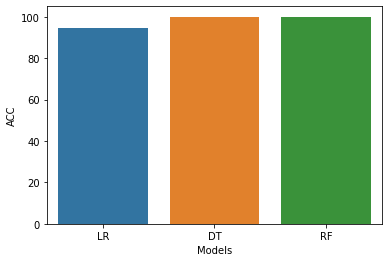

In [86]:
sns.barplot(final_data['Models'],final_data['ACC'])

# Save The Model

In [87]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [88]:
import joblib

In [89]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [90]:
model = joblib.load("credit_card_model")

In [91]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [92]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation
